###Import libraries

In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

###Mount Google drive

In [30]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Importing data

In [31]:
Breast_cancer = pd.read_csv('/content/drive/MyDrive/BA 890/breast-cancer.csv')
Breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
Breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###Data Cleanup

In [34]:
Breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

####There are no null values in the data.

####Since we are trying to predict the categorical variable **diagnosis**, we need to change its type from an object to category.

In [35]:
Breast_cancer['diagnosis']=Breast_cancer['diagnosis'].astype('category')

In [36]:
Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

####We can see that that the type of diagnosis is category now.

###Exploratory Data Analysis

####Checking correlation of the variables.

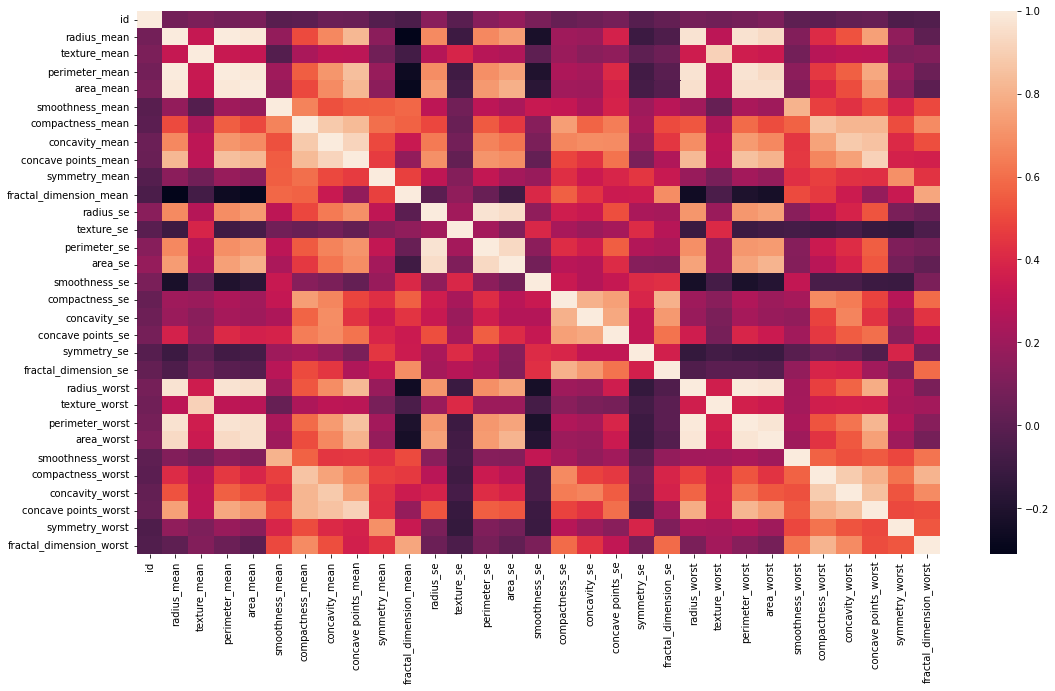

In [37]:
plt.figure(figsize=(18,10))
sns.heatmap(Breast_cancer.corr())

####Let's take a look at the distribution of Benign and Malignant cases.

In [38]:
Breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


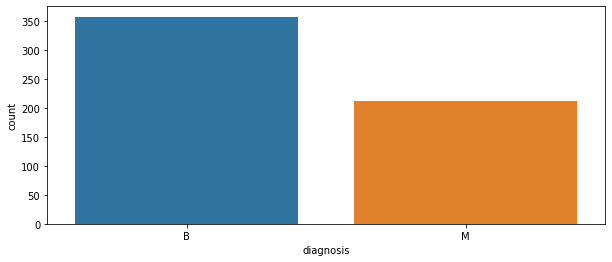

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(Breast_cancer['diagnosis'],label='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


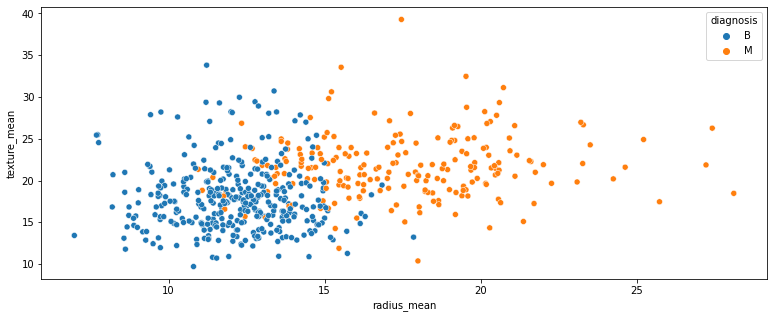

In [40]:
plt.figure(figsize=(13,5))
sns.scatterplot(Breast_cancer['radius_mean'],Breast_cancer['texture_mean'],hue=Breast_cancer['diagnosis'])

Radius_mean and texture mean for malignant tumor is higher than for beningn tumor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


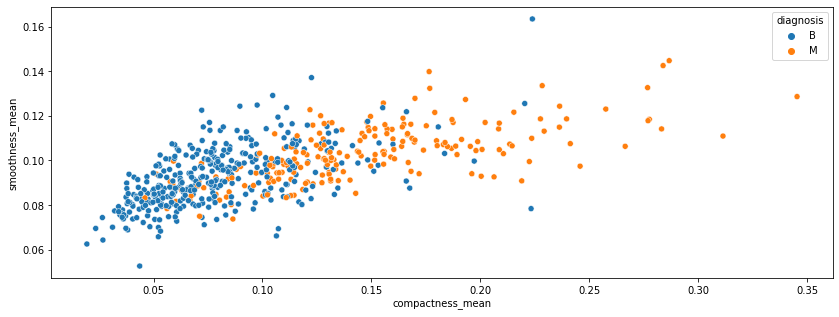

In [41]:
plt.figure(figsize=(14,5),)
sns.scatterplot(Breast_cancer['compactness_mean'],Breast_cancer['smoothness_mean'],hue=Breast_cancer['diagnosis'])

compactness_mean and smoothness_mean both are higher for Beningn tumor.

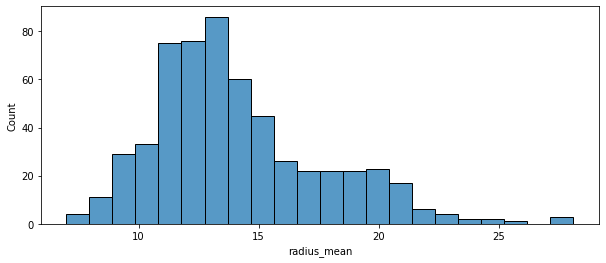

In [42]:
plt.figure(figsize=(10,4))
sns.histplot(Breast_cancer['radius_mean'])

####Most of the tumors lies in size range of (12,15)

####We'll create dummy variables for the **diagnosis** column.

In [54]:
Breast_cancer = pd.get_dummies(Breast_cancer, columns=['diagnosis'])
Breast_cancer

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


####Let's drop the **id** and **diagnosis_B** columns since we're only predicting Malignant cases.

In [55]:
Breast_cancer.drop(columns=['id', 'diagnosis_B'],inplace= True)

In [57]:
Breast_cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


###Feature selection

In [58]:
X = Breast_cancer.drop(columns='diagnosis_M')
y = Breast_cancer['diagnosis_M']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [62]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

####Let's take a look at the correlation of different variables in our training set.

In [63]:
X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.295249,0.998198,0.986838,0.173862,0.514335,0.691099,0.825141,0.130055,-0.334691,...,0.968661,0.261985,0.965167,0.940438,0.124559,0.410200,0.545764,0.739982,0.148186,-0.003661
texture_mean,0.295249,1.000000,0.301988,0.297965,-0.019339,0.227062,0.293874,0.278706,0.072918,-0.081656,...,0.330626,0.908330,0.336144,0.330487,0.098100,0.262653,0.301430,0.274823,0.094799,0.110480
perimeter_mean,0.998198,0.301988,1.000000,0.986457,0.207606,0.560260,0.726532,0.851581,0.162203,-0.290120,...,0.968600,0.269238,0.969497,0.941052,0.154020,0.448652,0.579350,0.765648,0.170639,0.035775
area_mean,0.986838,0.297965,0.986457,1.000000,0.179881,0.504877,0.699187,0.823800,0.130645,-0.305238,...,0.960038,0.256899,0.957628,0.957294,0.126771,0.384823,0.526975,0.713896,0.122938,-0.008668
smoothness_mean,0.173862,-0.019339,0.207606,0.179881,1.000000,0.657633,0.523092,0.547595,0.524757,0.577168,...,0.210894,0.048346,0.232888,0.203238,0.804715,0.472693,0.446719,0.501396,0.390637,0.500584
compactness_mean,0.514335,0.227062,0.560260,0.504877,0.657633,1.000000,0.882086,0.839100,0.593590,0.530379,...,0.543543,0.244771,0.590145,0.515566,0.591149,0.866026,0.832798,0.829554,0.512781,0.677353
concavity_mean,0.691099,0.293874,0.726532,0.699187,0.523092,0.882086,1.000000,0.929651,0.487250,0.305407,...,0.697692,0.294430,0.731906,0.684334,0.461758,0.733864,0.880082,0.860910,0.391928,0.491046
concave points_mean,0.825141,0.278706,0.851581,0.823800,0.547595,0.839100,0.929651,1.000000,0.445337,0.142726,...,0.829749,0.283116,0.852753,0.807316,0.456557,0.665314,0.770467,0.907160,0.371893,0.359519
symmetry_mean,0.130055,0.072918,0.162203,0.130645,0.524757,0.593590,0.487250,0.445337,1.000000,0.465672,...,0.161643,0.083067,0.190340,0.151767,0.409629,0.461318,0.425195,0.421450,0.701085,0.432600
fractal_dimension_mean,-0.334691,-0.081656,-0.290120,-0.305238,0.577168,0.530379,0.305407,0.142726,0.465672,1.000000,...,-0.280000,-0.041873,-0.239676,-0.258208,0.531849,0.443050,0.327967,0.161519,0.340958,0.766143


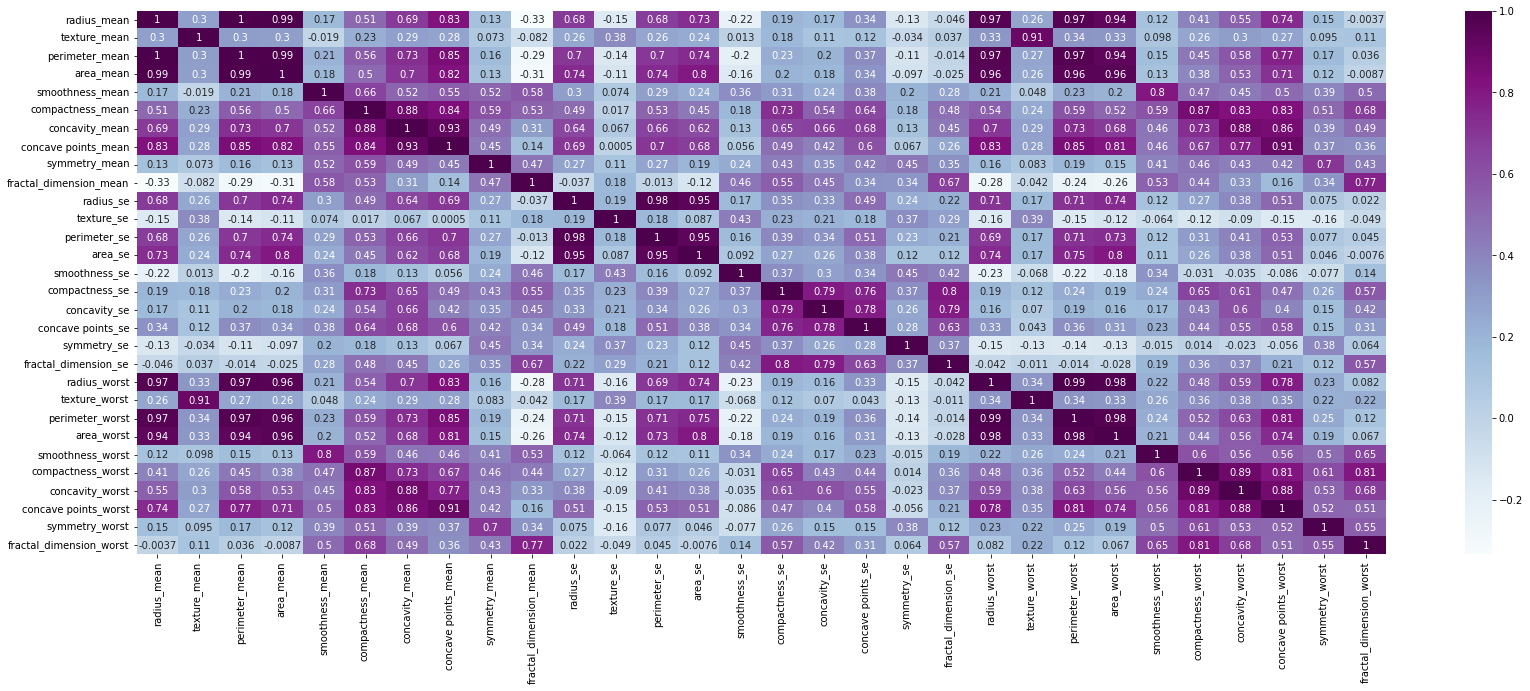

In [68]:
plt.figure(figsize=(28,10))
Corr = X_train.corr()
sns.heatmap(Corr, annot=True, cmap=plt.cm.BuPu)
plt.show()

####We'll only select the highly correlated features from the dataset.

In [69]:
def correlation(dataset, threshold):
    Correlated_col = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                Correlated_col.add(colname)
    return Correlated_col

In [71]:
Corr_features = correlation(X_train, 0.8)
Corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

####We have 15 features that are not highly correlated. We'll remove these features from our data so that we can make more accurate predictions.

In [72]:
X_train = X_train.drop(Corr_features,axis=1)
X_test = X_test.drop(Corr_features,axis=1)

In [73]:
X_train.shape,X_test.shape

((398, 15), (171, 15))

###Feature Scaling

In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Logistic Regression

In [75]:
Reg = LogisticRegression(random_state = 0)
Reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [77]:
y_pred = Reg.predict(X_test)

In [79]:
Accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {Accuracy_lr}")

Accuracy score: 0.9415204678362573


### K-NN model

In [80]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
y_pred = KNN.predict(X_test)

In [82]:
Accuracy_KNN = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {Accuracy_KNN}")

Accuracy score: 0.9239766081871345


###Naive Bayes

In [85]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [86]:
y_pred = GNB.predict(X_test)

In [88]:
Accuracy_GNB = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {Accuracy_GNB}")

Accuracy score : 0.9122807017543859


###Decision Tree

In [91]:
Decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [92]:
y_pred = Decision_tree.predict(X_test)

In [93]:
Accuracy_DT = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {Accuracy_DT}")

Accuracy score: 0.8830409356725146


###XG Boost

In [115]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier()

In [116]:
y_pred = XGB.predict(X_test)

In [117]:
Accuracy_XGB = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {Accuracy_XGB}")

Accuracy Score: 0.935672514619883


###Random Forest

In [112]:
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [113]:
y_pred = RF.predict(X_test)

In [114]:
Accuracy_RF = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {Accuracy_RF}")

Accuracy Score: 0.9239766081871345


###Comparing different Accuracy Scores

In [102]:
Accuracy_Score=[]
Model=[]

Accuracy_Score.append(Accuracy_lr)
Model.append("Logistic Regression")

Accuracy_Score.append(Accuracy_KNN)
Model.append("K-Nearest Neighbours")

Accuracy_Score.append(Accuracy_GNB)
Model.append("Naive Bayes")

Accuracy_Score.append(Accuracy_DT)
Model.append("Decision Tree")

Accuracy_Score.append(Accuracy_RF)
Model.append("Random Forest")

Accuracy_Score.append(Accuracy_XGB)
Model.append("XG Boost")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

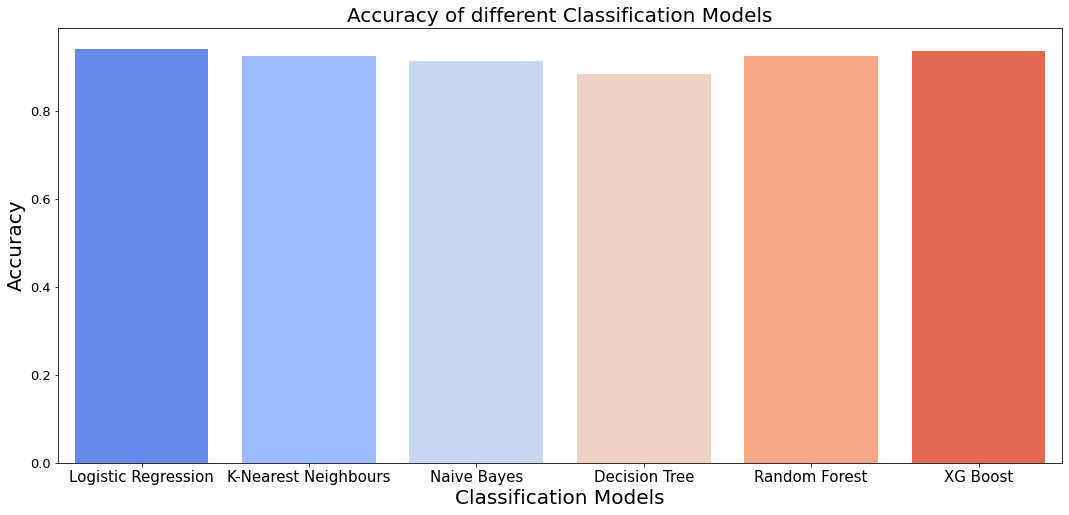

In [108]:
plt.rcParams['figure.figsize']=18,8
ax = sns.barplot(x=Model, y=Accuracy_Score, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 15, horizontalalignment = 'center')
plt.yticks(fontsize = 13)